In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
import itertools
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("phishing_site_urls.csv")

In [3]:
df.shape

(549346, 2)

In [4]:
df.describe

<bound method NDFrame.describe of                                                       URL Label
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3       mail.printakid.com/www.online.americanexpress....   bad
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad
...                                                   ...   ...
549341                                    23.227.196.215/   bad
549342                                 apple-checker.org/   bad
549343                                  apple-iclods.org/   bad
549344                                 apple-uptoday.org/   bad
549345                                  apple-search.info   bad

[549346 rows x 2 columns]>

In [5]:
df.columns

Index(['URL', 'Label'], dtype='object')

In [6]:
df[df.Label == 'good']

,URL,Label
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good
...,...,...
483590,youthleaguesusa.com/potomacsoccer/2011/Tournam...,good
483591,zip-codes.com/,good
483592,owens.edu/news-releases/?p=2052,good
483593,1.safesecureweb.com/egale/index.asp?item=1173,good


In [7]:
df[df.Label == 'bad']

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [8]:
df.Label.value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

In [9]:
df.duplicated().sum()

42150

In [10]:
df=df.drop_duplicates()

df.shape

(507196, 2)

Now we will extract the features from the dataframe through the help of regular expressions

Detecting the ip addresses present in the URLS

In [11]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    
    if match:
        return 1
    else:
        return 0
    
df['use_of_ip'] = df['URL'].apply(lambda i : having_ip_address(i))

C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\2867823922.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['use_of_ip'] = df['URL'].apply(lambda i : having_ip_address(i))


In [12]:
df[df.use_of_ip==1]

,URL,Label,use_of_ip
691,justperioddrama.com/haccess/www./loginAction/p...,bad,1
843,justperioddrama.com/haccess/www./loginAction/p...,bad,1
1920,paulgolding.us/img/icons/tabs/20.20/20.20.20.2...,bad,1
1921,paulgolding.us/img/icons/tabs/20.20/20.20.20.2...,bad,1
5147,www.jixtobe.com/cielo+fidelidade&oq=cielo+&gs_...,bad,1
...,...,...,...
515981,5.200.52.198/flex/3435dde3r.exe,bad,1
515982,195.22.127.233/rec/fre.php,bad,1
516407,185.163.46.150/software.exe,bad,1
516449,60.250.76.52/,bad,1


In [13]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 1
    else:
        return 0


df['abnormal_url'] = df['URL'].apply(lambda i: abnormal_url(i))

C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\3371294648.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abnormal_url'] = df['URL'].apply(lambda i: abnormal_url(i))


In [14]:
df[df.abnormal_url==1]

,URL,Label,use_of_ip,abnormal_url
43253,training.oztechnologies.co.za/tbc/oz_online/St...,bad,0,1
98635,http://www.oilchangeasheville.com/https:/www2....,bad,0,1
99518,http://leticiaaraujo.com.br/VAN-GOG.969/ATUALI...,bad,0,1
99531,http://leticiaaraujo.com.br/VAN-GOG.969/ATUALI...,bad,0,1
100287,http://www.ime.edu.co/firmasime/Santander/pess...,bad,0,1
...,...,...,...,...
499878,https.portal.apple.com.idmswebauth.login.html....,bad,0,1
514554,ftp://evaldogomes@ftp.evaldogomes.com.br/publi...,bad,0,1
514647,tftp://93.190.142.201/7up,bad,1,1
514652,ftp://95.215.62.11/bin3.sh,bad,1,1


In [15]:
!pip install googlesearch-python

In [16]:
from googlesearch import search

def google_index(url):
    site = search(url,2)
    return 1 if site else 0
df['google_index'] = df['URL'].apply(lambda i: google_index(i))

C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\3311551449.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['google_index'] = df['URL'].apply(lambda i: google_index(i))


In [17]:
df.google_index.value_counts()

1    507196
Name: google_index, dtype: int64

HERE we don't have anything to do in google search, Now we will have to count all the lexical function for the URLs


In [18]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['URL'].apply(lambda i: count_dot(i))

def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['URL'].apply(lambda i: count_www(i))

def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['URL'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['URL'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['URL'].apply(lambda i: no_of_embed(i))


C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\1360711941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count.'] = df['URL'].apply(lambda i: count_dot(i))
C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\1360711941.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count-www'] = df['URL'].apply(lambda i: count_www(i))
C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\1360711941.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

NOW we will find the shortneing service of the URLs


In [19]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['URL'].apply(lambda i: shortening_service(i))

C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\2573280485.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['short_url'] = df['URL'].apply(lambda i: shortening_service(i))


In [20]:
df.short_url.value_counts()

0    472783
1     34413
Name: short_url, dtype: int64

Checking the URl having the HTTP or HTTPS headers

In [21]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['URL'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['URL'].apply(lambda i : count_http(i))

C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\2283066976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count-https'] = df['URL'].apply(lambda i : count_https(i))
C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\2283066976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count-http'] = df['URL'].apply(lambda i : count_http(i))


Now checking all the count features of numeric and alphanumeric characters

In [22]:
def count_per(url):
    return url.count('%')

df['count%'] = df['URL'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['URL'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['URL'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')

df['count='] = df['URL'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['URL'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['URL'].apply(lambda i: hostname_length(i))


def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['URL'].apply(lambda i: suspicious_words(i))


def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['URL'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['URL'].apply(lambda i: letter_count(i))


C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\4209249048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count%'] = df['URL'].apply(lambda i : count_per(i))
C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\4209249048.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count?'] = df['URL'].apply(lambda i: count_ques(i))
C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\4209249048.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

NOw we will check the TOP level DOMAIN of the URLs


In [23]:
!pip install tld

In [24]:
from tld import get_tld
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['URL'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['URL'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\2540710368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fd_length'] = df['URL'].apply(lambda i: fd_length(i))
C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\2540710368.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tld'] = df['URL'].apply(lambda i: get_tld(i,fail_silently=True))
C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\2540710368.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [25]:
df.tld.value_counts()

com       64
com.br    16
net        4
ru         4
de         4
org        3
ga         2
lu         2
no         2
gov.vn     2
gq         2
ws         1
in         1
it         1
inf.br     1
eu         1
es         1
com.ba     1
edu.co     1
info       1
Name: tld, dtype: int64

In [26]:
df.head()

,URL,Label,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,0,1,6,0,0,8,0,...,4,4,225,0,1,58,135,35,None,-1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,0,0,1,5,1,0,4,0,...,2,2,81,0,1,1,65,12,None,-1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,0,1,7,0,0,11,0,...,1,0,177,0,1,47,111,76,None,-1
3,mail.printakid.com/www.online.americanexpress....,bad,0,0,1,6,1,0,2,0,...,0,0,60,0,0,0,52,30,None,-1
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,0,1,1,0,0,7,0,...,1,0,116,0,0,21,82,10,None,-1


In [27]:
df.to_csv('phishing_data_processed.csv')

In [28]:
df = df.drop(['tld','google_index'],1)

C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\2927751400.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['tld','google_index'],1)


In [29]:
df.columns

Index(['URL', 'Label', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count@', 'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count-digits', 'count-letters',
       'fd_length', 'tld_length'],
      dtype='object')

In [30]:
df.describe()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld_length
count,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,...,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000,507196.000000
mean,0.005314,0.000264,2.058309,0.105005,0.003847,2.434751,0.001558,0.067850,0.001928,0.007530,...,0.164254,1.194041,0.279237,51.467021,0.004927,0.074618,4.745191,39.653314,8.269480,-0.999016
std,0.072700,0.016252,1.523663,0.315479,0.068264,1.515993,0.040811,0.251488,0.046657,0.099191,...,0.469651,2.494428,0.936653,42.846356,0.351044,0.262774,11.301783,30.234542,10.313914,0.068480
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,24.000000,4.000000,-1.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,1.000000,33.000000,6.000000,-1.000000
75%,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,60.000000,0.000000,0.000000,6.000000,47.000000,10.000000,-1.000000
max,1.000000,1.000000,37.000000,5.000000,10.000000,34.000000,5.000000,1.000000,4.000000,9.000000,...,166.000000,42.000000,34.000000,2307.000000,46.000000,1.000000,545.000000,2141.000000,408.000000,6.000000


In [31]:
import dython

C:\Users\tigna\AppData\Local\Temp\ipykernel_25312\904275108.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


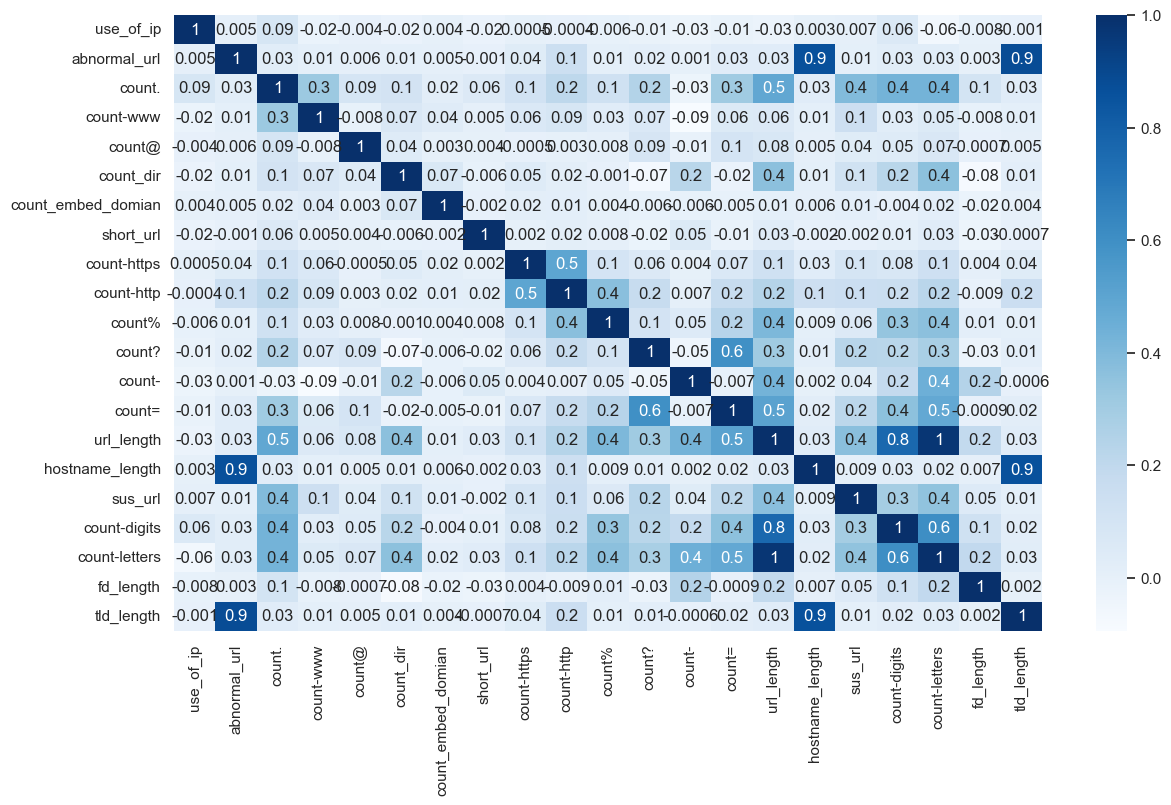

In [32]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [33]:
df.Label.value_counts()

good    392897
bad     114299
Name: Label, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Label"] = lb_make.fit_transform(df["Label"])
df["Label"].value_counts()

1    392897
0    114299
Name: Label, dtype: int64

In [35]:
df.columns

Index(['URL', 'Label', 'use_of_ip', 'abnormal_url', 'count.', 'count-www',
       'count@', 'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count-digits', 'count-letters',
       'fd_length', 'tld_length'],
      dtype='object')

In [36]:
y = df['Label']
y.shape

(507196,)

In [37]:
x = df.drop(["Label",'URL'],axis = 1)
x.head()
x.shape

(507196, 21)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

This is the basic procedure for the data preprocess now We will apply the ML model and predict the accuracy

In the model we will have to add the balancing and standardistaion with multiple data stiching to make it more practical

In advance course we will try to use deep learning to make more accurate predictions.

From here We BUild the models

## 1. Random Forest Classifier


In [39]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')  # we can change the n_estimators but it is subject to overfitting of the data as the data is not that balanced
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['Good', 'Bad']))

score = accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

        Good       0.85      0.72      0.78     22860
         Bad       0.92      0.96      0.94     78580

    accuracy                           0.91    101440
   macro avg       0.89      0.84      0.86    101440
weighted avg       0.91      0.91      0.91    101440

accuracy:   0.908


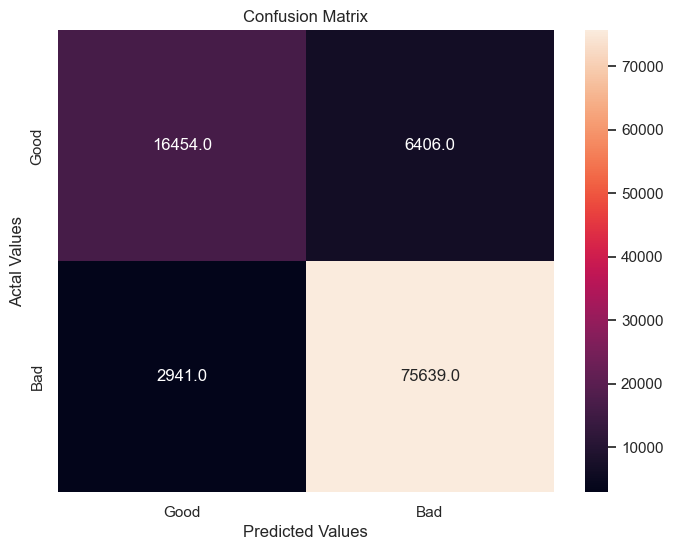

In [41]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['Good', 'Bad'], 
                     columns = ['Good', 'Bad'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

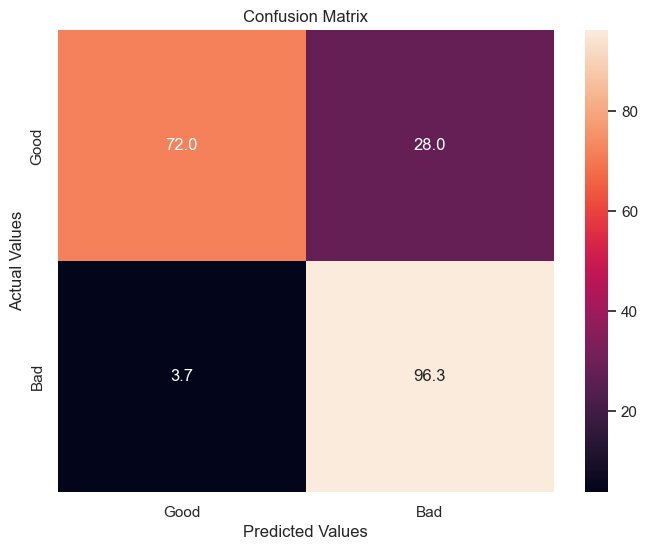

In [42]:

cm = confusion_matrix(y_test, y_pred_rf)
# Calculate the percentages
cm_percent = cm / cm.sum(axis=1).reshape(-1, 1) * 100
# Create a DataFrame from the percentage matrix
cm_df = pd.DataFrame(cm_percent, index=['Good', 'Bad'], columns=['Good', 'Bad'])
# Set up the figure size
plt.figure(figsize=(8, 6))
# Generate the heatmap using seaborn
sns.heatmap(cm_df, annot=True, fmt=".1f")

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()


<Axes: >

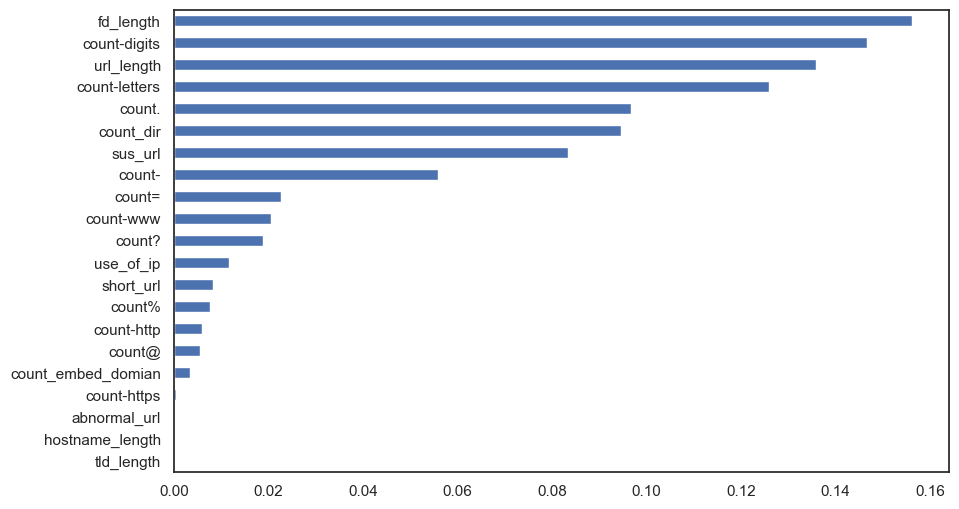

In [43]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)  # to understaand the important features
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))  # horizontal BAr platform


In [44]:
! pip install lightgbm

In [45]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(objective= 'binary',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=["Good", "Bad"]))

score = accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

c:\Users\tigna\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


              precision    recall  f1-score   support

        Good       0.89      0.59      0.71     22860
         Bad       0.89      0.98      0.93     78580

    accuracy                           0.89    101440
   macro avg       0.89      0.78      0.82    101440
weighted avg       0.89      0.89      0.88    101440

accuracy:   0.891


## 5.1. Logistic Regression


In [46]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)
y_pred_log = log.predict(X_test)

print(classification_report(y_test,y_pred_log,target_names=['Good', 'Bad']))

score = accuracy_score(y_test, y_pred_log)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

        Good       0.81      0.35      0.49     22860
         Bad       0.84      0.98      0.90     78580

    accuracy                           0.83    101440
   macro avg       0.82      0.66      0.69    101440
weighted avg       0.83      0.83      0.81    101440

accuracy:   0.835


c:\Users\tigna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 33.249999999999986, 'Predicted Values')

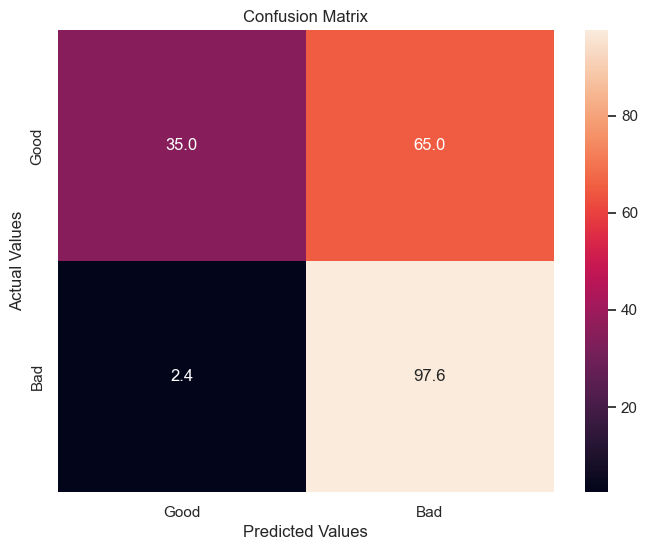

In [47]:

cm = confusion_matrix(y_test, y_pred_log)
# Calculate the percentages
cm_percent = cm / cm.sum(axis=1).reshape(-1, 1) * 100
# Create a DataFrame from the percentage matrix
cm_df = pd.DataFrame(cm_percent, index=['Good', 'Bad'], columns=['Good', 'Bad'])
# Set up the figure size
plt.figure(figsize=(8, 6))
# Generate the heatmap using seaborn
sns.heatmap(cm_df, annot=True, fmt=".1f")

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# Display the plot

## K Nearest Neighbors

In [48]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

#fit the model
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test,y_pred_knn,target_names=['Good', 'Bad']))

score = accuracy_score(y_test, y_pred_knn)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

        Good       0.73      0.69      0.71     22860
         Bad       0.91      0.93      0.92     78580

    accuracy                           0.87    101440
   macro avg       0.82      0.81      0.81    101440
weighted avg       0.87      0.87      0.87    101440

accuracy:   0.873


### Checking the best neighbor and standardindising my x to find the best neighbor

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#### Taking very long time in my local system and in collab

In [50]:
# k_values = [i for i in range (1,31)]
# scores = []

# scaler = StandardScaler()
# X = scaler.fit_transform(x)

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knn, X, y, cv=5)
#     scores.append(np.mean(score))

In [51]:
# # Support Vector Classifier model 
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # defining parameter range
# param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

# svc = GridSearchCV(SVC(), param_grid)

# # fitting the model for grid search
# svc.fit(X_train, y_train)

# y_pred_svc = svc.predict(X_test)

# print(classification_report(y_test,y_pred_svc,target_names=['Good', 'Bad']))
# #
# score = accuracy_score(y_test, y_pred_svc)
# print("accuracy:   %0.3f" % score)


In [52]:
# xgb_c = xgb.XGBClassifier(n_estimators= 100)
# xgb_c.fit(X_train,y_train)
# y_pred_xgb = xgb_c.predict(X_test)
# print(classification_report(y_test,y_pred_xgb,target_names=["Good","Bad"]))


# score = metrics.accuracy_score(y_test, y_pred_xgb)
# print("accuracy:   %0.3f" % score)

## Prediction of the URL

In [56]:
def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))
    
    
    

    return status

In [61]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    

    pred = log.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="UNSAFE"
        return res

In [64]:
urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota',"https://www.youtube.com/watch?v=u6qy5INiAxk","https://scikit-learn.org/stable/modules/cross_validation.html"]
for url in urls:
     print(get_prediction_from_url(url))

UNSAFE
UNSAFE
SAFE
SAFE


c:\Users\tigna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\tigna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\tigna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\tigna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
